# Scraping

### Setups and configulations

In [1]:
import os
import sys
import re
import requests
from bs4 import BeautifulSoup
import bibtexparser
import pickle
sys.path.append('../')
import confana
#from common import *

### Execute scraping

loading ./cache/ICCV/summary2013...
	22 Japanese authors out of all 1541 authors
	14 Japanese related papers out of all 454 papers
loading ./cache/ICCV/summary2015...
	46 Japanese authors out of all 1997 authors
	20 Japanese related papers out of all 526 papers
loading ./cache/ICCV/summary2017...
	34 Japanese authors out of all 2550 authors
	16 Japanese related papers out of all 621 papers
loading ./cache/ICCV/summary2019...
	60 Japanese authors out of all 4837 authors
	25 Japanese related papers out of all 1075 papers
loading ./cache/ICCV/summary2021...
	67 Japanese authors out of all 8044 authors
	33 Japanese related papers out of all 1612 papers
loading ./cache/ICCV/summary2023...
	87 Japanese authors out of all 11562 authors
	45 Japanese related papers out of all 2161 papers
Tatsuya Harada	9
Imari Sato	6
Yasutaka Furukawa	6
Yoichi Sato	5
Masatoshi Okutomi	5
Shohei Nobuhara	5
Kuniaki Saito	5
Shunsuke Saito	5
Masayoshi Tomizuka	5
Ko Nishino	4
Yasuyuki Matsushita	4
Takayuki Okatani	4


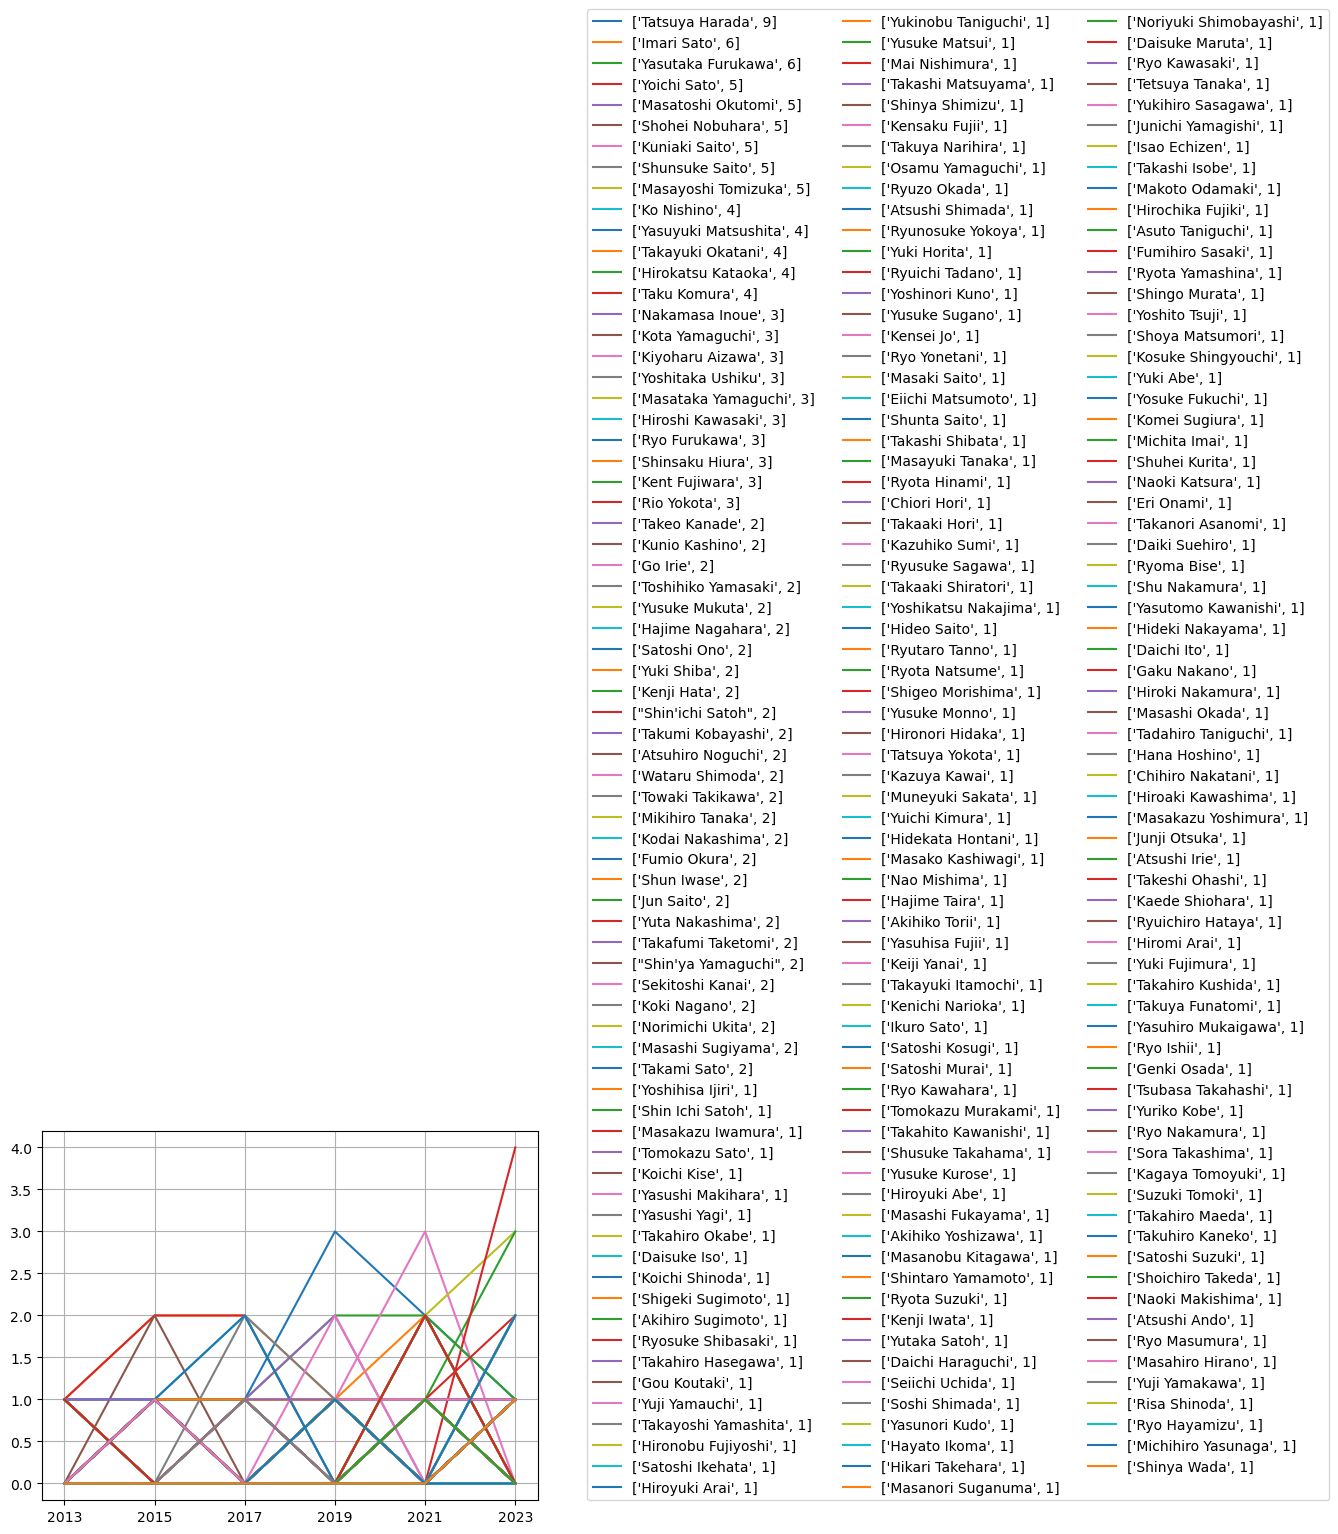

In [18]:
# configurations
param = confana.set_param('https://openaccess.thecvf.com/', 'ICCV', 2013, 2023, 2, 1)

histall = {}
for year in range(param.yearFrom, param.yearTo, param.interval):
    yr = str(year)
    pklfl = param.cachedir + '/' + 'summary' + yr

    if os.path.exists(pklfl):
        with open(pklfl,'rb') as f:
            authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pickle.load(f)
            print(f'loading {pklfl}...')
        print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
        print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
    else:
        conf = param.conf_prefix + yr
        print(conf,'...')
        pu = confana.parseUrl(param,yr)
        normal, authorss, titles = pu.parseCVF()
        if normal < 0: 
            print('parsing failed...')

        pAT = confana.parseATlist(titles, authorss)
        jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pAT.selectJP()
        hist = pAT.makehist(jpauthors,yr)

        with open(pklfl, 'wb') as f:
            pickle.dump((authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper), f)

        print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
        print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
    #print(jpauthors)
    #for ii in range(0,len(jpauthors)):
    #    print(f'{jpauthors[ii]}\t{jptitles[ii]}')
    pAT = confana.parseATlist(titles, authorss)
    histall = pAT.mergehist(histall,hist,yr)

ph = confana.parseHist(param,histall)
ph.plotsorted()

### Analysis of trends by titles

In [10]:
import pickle
import re

year = 2019
#stoplist = "^(a|an|the|in|on|to|of|with|without|by|from|for|via|using|and|or)$"
#seplist = ":\s|(^|\s)(a|an|the|in|on|to|of|with|without|by|from|for|via|using|and|or)(\s|$)"
#seplist = "\sa\s|\san\s|\sthe\s|\sin\s|\son\s|\sto\s|\sof\s|\swith\s|\swithout\s|\sby\s|\sfrom\s|\sfor\s|\svia\s|\susing\s|\sand\s|\sor\s|:\s|,\s|^on\s|^a\s|^an\s|^the\s"
#seplist = re.compile("\sa\s|\san\s|\sthe\s|\sin\s|\son\s|\sto\s|\sof\s|\swith\s|\swithout\s|\sby\s|\sfrom\s|\sfor\s|\svia\s|\sbeyond\s|\sas\s|\susing\s|\sand\s|\sor\s|\sis\s|\sam\s|\sare\s|:\s|,\s|^on\s|^a\s|^an\s|^the\s",re.IGNORECASE)
seplist = re.compile(":\s|(?:\s|^)(?:a|an|the|in|on|to|of|with|without|by|from|for|via|toward|towards|beyond|using|and|or|as|is|am|are)(?:\s|$)",re.IGNORECASE)
replist = re.compile("^(?:a|an|the|in)\s|\s(?:a|an|the|in)\s|s$|^\s$|^in$",re.IGNORECASE)


with open(param.cachedir + '/' +  'summary' + str(year) , 'rb' ) as f:
    authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pickle.load(f)

wordhist = {} 
for title in titles:
    words = seplist.split(title)
    for item in words:
        word = replist.sub("", item)
        #print(word)
        if word == "":
            continue
        if word in wordhist:
            wordhist[word] += 1
        else:
            wordhist[word] = 1

stwordhist = sorted( wordhist.items(), key = lambda x:-x[1] )
for item in stwordhist:
    if item[1] > 2:
        #print("{0:>50}: {1:>5}".format(item[0],item[1]))
        print("{0:}\t{1:}".format(item[0],item[1]))


Learning	34
Person Re-Identification	16
Video	14
Semantic Segmentation	14
Wild	10
Single Image	10
Object Detection	10
Generative Adversarial Network	8
Crowd Counting	7
Image Captioning	7
Video Object Detection	6
Convolutional Neural Network	6
Point Cloud	6
Unsupervised Learning	5
Few-Shot Learning	5
Dataset	5
Autonomous Driving	5
Domain Adaptation	5
Generation	5
Joint Learning	5
Unsupervised Domain Adaptation	4
Noisy Label	4
Image Inpainting	4
Vehicle Re-Identification	4
Neural Network	4
Single RGB Image	4
Tracking	4
Application	4
Motion	4
Deep Learning	4
Fast	4
Image	3
Visual Question Answering	3
Bridging	3
3D Human Pose Estimation	3
Large-Scale Dataset	3
Shape	3
Estimating	3
Benchmark	3
Salient Object Detection	3
Knowledge Distillation	3
Semi-Supervised Learning	3
Action Recognition	3
Monocular Video	3
Graph Convolutional Network	3
Image Dehazing	3
Dark	3
Segmentation	3
Zero-Shot Learning	3
Object	3
Better	3
End-to-End Learning	3
Weakly Supervised Object Detection	3
Adversarial Learn

### NER

In [ ]:
import pickle
import re
from rake_nltk import Rake

# configulations
year = 2014
seplist = re.compile(":\s|(?:\s|^)(?:a|an|the|in|on|to|of|with|without|by|from|for|via|toward|towards|beyond|using|and|or|as|is|am|are)(?:\s|$)",re.IGNORECASE)
replist = re.compile("^(?:a|an|the|in)\s|\s(?:a|an|the|in)\s|s$|^\s$|^in$",re.IGNORECASE)



# Uses stopwords for english from NLTK, and all punctuation characters by default
r = Rake()


# loading data
with open( 'summary' + str(year) , 'rb' ) as f:
    authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pickle.load(f)

wordhist = {}
for title in titles:
    r.extract_keywords_from_text(title)
    words = r.get_ranked_phrases()

    for item in words:
        #word = replist.sub("", item)
        word = item
        if word == "":
            continue
        if word in wordhist:
            wordhist[word] += 1
        else:
            wordhist[word] = 1

stwordhist = sorted( wordhist.items(), key = lambda x:-x[1] )
for item in stwordhist:
    if item[1] > 2:
        print("{0:>50}: {1:>5}".format(item[0],item[1]))
        #print("{0:}: {1:}".format(item[0],item[1]))


In [17]:
import pickle
import re

for year in range(2019,2024,2):
    print("----")
    print(year)
    with open(param.cachedir + '/' +   'summary' + str(year) , 'rb' ) as f:
        authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pickle.load(f)

    numpaper = len(titles)
    pt = confana.parseTitle(titles)
    stwordhist = pt.wordfreq()
        
    for item in stwordhist:
        ratio = item[1]/numpaper
        if ratio > 0.005:
            #print("{0:}\t{1:}\t{2:.5f}".format(item[0],item[1],ratio))
            print("{0:}\t{1:.5f}".format(item[0],ratio))
            #print("{0:}: {1:}".format(item[0],item[1]))


----
2019
Object Detection	0.06233
Adversarial	0.05860
Attention	0.05395
3D	0.04558
Unsupervised	0.04093
Video	0.03814
Semantic Segmentation	0.03721
Domain Adaptation	0.03535
Re Identification	0.03256
Weakly Supervised	0.02233
Representation Learning	0.02233
Few Shot	0.01767
Point Cloud	0.01674
Person Re Identification	0.01581
Metric Learning	0.01488
End to End	0.01395
Semi Supervised	0.01395
Zero Shot	0.01395
Captioning	0.01395
Neural Network	0.01302
Self Supervis	0.01302
Shot Learning	0.01302
Action Recognition	0.01302
Disentangl	0.01302
Style Transfer	0.01302
Super Resolution	0.01209
Attention Network	0.01116
Wild	0.01023
Camera	0.00930
Depth	0.00930
Sparse	0.00837
Instance Segmentation	0.00744
Face Recognition	0.00744
Image Retrieval	0.00744
Adversarial Network	0.00744
Reinforcement Learning	0.00744
Deep Learning	0.00651
Knowledge Distillation	0.00651
Supervised Learning	0.00651
Image Captioning	0.00651
Object Tracking	0.00651
Unsupervised Learning	0.00558
Video Object Detection	0.